In [52]:
import fitness
import glouton
import random_schedule
import local_search_descente
import simulated_annealing
import matplotlib.pyplot as plt
import time
import random

# Fonction d'affichage pour la planification
import matplotlib.pyplot as plt
import numpy as np

num_teams = 8

In [53]:
# Fonction d'affichage pour la planification
def print_schedule(schedule, filename='schedule.png'):
    num_weeks = len(schedule)
    num_periods = len(schedule[0]) if num_weeks > 0 else 0

    # Créer une matrice pour représenter le tableau
    schedule_matrix = np.full((num_weeks, num_periods), '', dtype=object)

    # Remplir la matrice avec les équipes ou une indication de cellule vide
    for week in range(num_weeks):
        for period in range(num_periods):
            match = schedule[week][period]
            if match:
                schedule_matrix[week, period] = f"{match[0]} vs {match[1]}"
            else:
                schedule_matrix[week, period] = "(vide)"

    # Créer une figure et des axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # Afficher le tableau avec Matplotlib
    ax.axis('tight')
    ax.axis('off')

    # Créer un tableau à partir de la matrice
    table = ax.table(cellText=schedule_matrix,
                     colLabels=[f"Période {i+1}" for i in range(num_periods)],
                     rowLabels=[f"Semaine {i+1}" for i in range(num_weeks)],
                     cellLoc='center',
                     loc='center')

    # Personnaliser l'apparence du tableau
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)  # Ajustez la taille des cellules si nécessaire

    # Sauvegarder l'image du tableau
    plt.savefig(filename, bbox_inches='tight')
    plt.show()  # Afficher le tableau

In [54]:
def mean_score(algo='glouton', num_teams=8, it=200):
    sum_fitness = 0  # Pour stocker la somme des scores de fitness
    total_time = 0   # Pour stocker la somme des temps d'exécution
    max_fitness = 0  # Pour stocker le score de fitness maximal
    min_fitness = 1000000  # Pour stocker le score de fitness minimal
    best_params = {} # Pour stocker les meilleurs paramètres

    for i in range(it):
        start_time = time.time()  # Démarre le chronomètre pour l'itération
        
        # Random temperature and cooling rate

        initial_temp = random.uniform(50, 300)
        cooling_rate = random.uniform(0.60, 0.99)

        # Choisir la méthode de planification
        if algo == 'glouton':
            schedule = glouton.round_robin_schedule(num_teams)
        elif algo == 'random':
            schedule = random_schedule.random_round_robin_schedule(num_teams)
        elif algo == 'local_search_random':
            schedule = local_search_descente.local_search(random_schedule.random_round_robin_schedule(num_teams), num_teams, max_iterations=1000, verbose=False)[0]
        elif algo == 'local_search_glouton':
            schedule = local_search_descente.local_search(glouton.round_robin_schedule(num_teams), num_teams, max_iterations=1000, verbose=False)[0]
        elif algo == 'simulated_annealing_random':
            schedule = simulated_annealing.simulated_annealing(random_schedule.random_round_robin_schedule(num_teams), num_teams, max_iterations=2000, verbose=False, initial_temp=initial_temp, cooling_rate=cooling_rate)[0]
        elif algo == 'simulated_annealing_glouton':
            schedule = simulated_annealing.simulated_annealing(glouton.round_robin_schedule(num_teams), num_teams, max_iterations=2000, verbose=False, initial_temp=initial_temp, cooling_rate=cooling_rate)[0]

        # Calculer le score de fitness
        score = fitness.evaluate_schedule(schedule, 8, False)
        sum_fitness += score  # Ajoute le score de fitness à la somme totale
        
        if score < min_fitness:
            min_fitness = score
            best_params = {'initial_temp': initial_temp, 'cooling_rate': cooling_rate}
        if score > max_fitness:
            max_fitness = score

        end_time = time.time()  # Arrête le chronomètre
        total_time += (end_time - start_time)  # Ajoute le temps écoulé à la somme totale

    # Moyenne des scores et des temps
    mean_fitness = sum_fitness / it
    mean_time = total_time / it

    print("Calcul de la moyenne pour " + algo + " sur " + str(it) + " itérations avec " + str(num_teams) + " équipes")
    print(f"Temps moyen d'exécution pour {algo}: {mean_time:.5f} secondes")
    print(f"Score moyen de fitness pour {algo}: {mean_fitness:.5f}")
    print(f"Score maximal de fitness pour {algo}: {max_fitness:.5f}")
    print(f"Score minimal de fitness pour {algo}: {min_fitness:.5f}")
    if algo == 'simulated_annealing_random' or algo == 'simulated_annealing_glouton':
        print(f"Meilleurs paramètres - Température initiale: {best_params['initial_temp']:.2f}, Taux de refroidissement: {best_params['cooling_rate']:.2f}")
    print("\n")

    return mean_fitness, mean_time



Calcul de la moyenne pour glouton sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour glouton: 0.00003 secondes
Score moyen de fitness pour glouton: 640.00000
Score maximal de fitness pour glouton: 640.00000
Score minimal de fitness pour glouton: 640.00000


Exemple de planification pour un glouton : Score de la planification (pénalités totales): 640


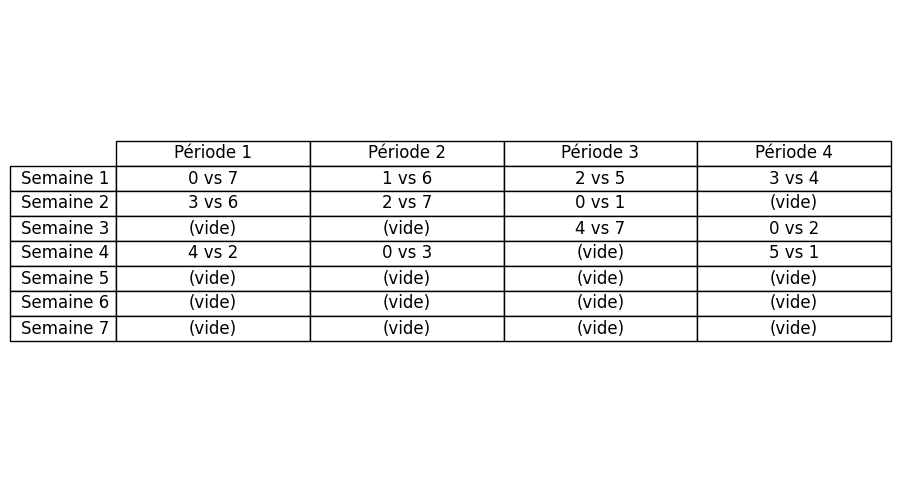

In [55]:

    num_teams = 8
    # glouton 
    scheduleGlouton = glouton.round_robin_schedule(num_teams)
    penaltyGlouton = fitness.evaluate_schedule(scheduleGlouton, num_teams, False)
    print("\n")
    mean_score('glouton')
    print(f"Exemple de planification pour un glouton : Score de la planification (pénalités totales): {penaltyGlouton}")
    print_schedule(scheduleGlouton)




Calcul de la moyenne pour random sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour random: 0.00004 secondes
Score moyen de fitness pour random: 456.29500
Score maximal de fitness pour random: 682.00000
Score minimal de fitness pour random: 270.00000


Exemple de planification pour un random : Score de la planification (pénalités totales): 479


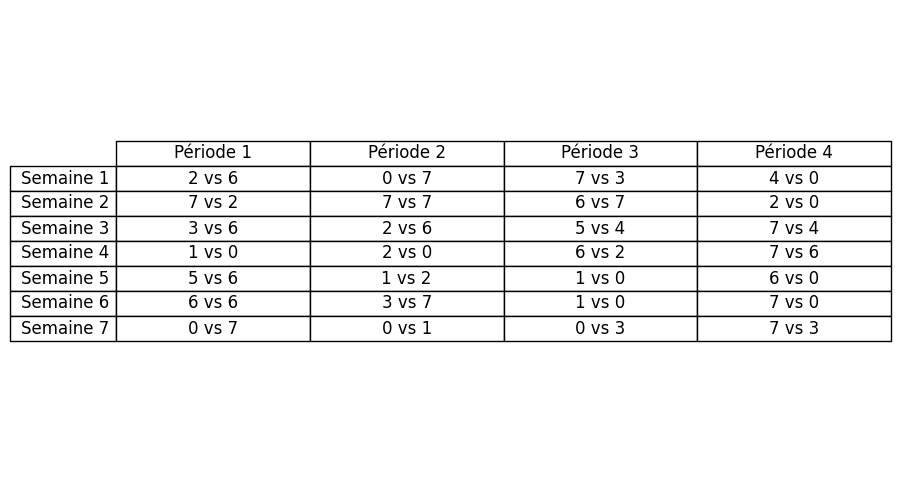

In [56]:
    # random
    scheduleRandom = random_schedule.random_round_robin_schedule(num_teams)
    penaltyRandom = fitness.evaluate_schedule(scheduleRandom, num_teams, False)
    print("\n")
    mean_score('random')
    print(f"Exemple de planification pour un random : Score de la planification (pénalités totales): {penaltyRandom}")
    print_schedule(scheduleRandom)



Calcul de la moyenne pour local_search_random sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour local_search_random: 0.07931 secondes
Score moyen de fitness pour local_search_random: 54.76500
Score maximal de fitness pour local_search_random: 133.00000
Score minimal de fitness pour local_search_random: 6.00000


Exemple de planification pour la recherche locale a partir d'un random : Score de la planification (pénalités totales): 71


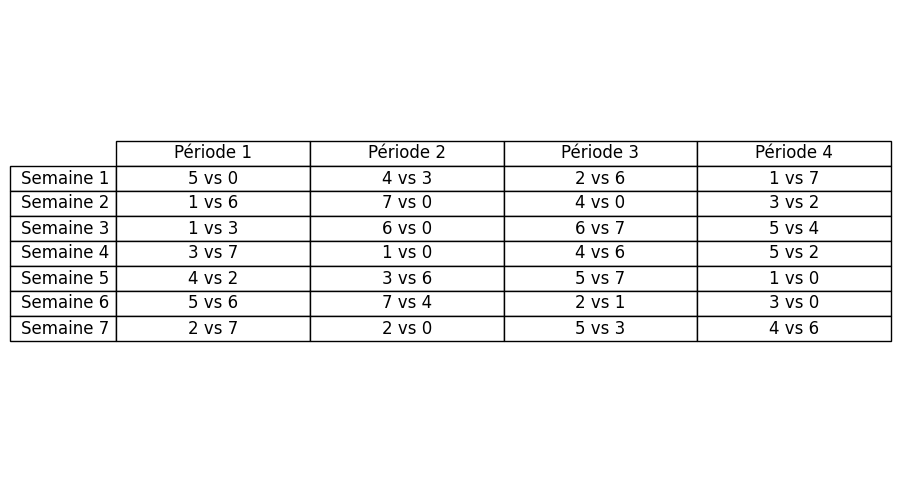

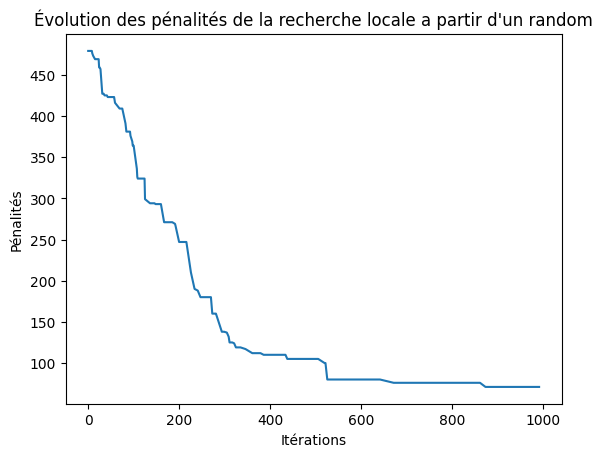

In [57]:
    # recherche locale
    scheduleLocal, penaltyLocal, penalty_history = local_search_descente.local_search(scheduleRandom, num_teams, max_iterations=1000, verbose=False)
    print("\n")
    mean_score('local_search_random')
    print(f"Exemple de planification pour la recherche locale a partir d'un random : Score de la planification (pénalités totales): {penaltyLocal}")
    print_schedule(scheduleLocal)
    # Pour tracer les pénalités
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités de la recherche locale a partir d\'un random')
    plt.show()



Calcul de la moyenne pour local_search_glouton sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour local_search_glouton: 0.07116 secondes
Score moyen de fitness pour local_search_glouton: 51.45500
Score maximal de fitness pour local_search_glouton: 116.00000
Score minimal de fitness pour local_search_glouton: 4.00000


Exemple de planification pour la recherche locale a partir d'un glouton : Score de la planification (pénalités totales): 48


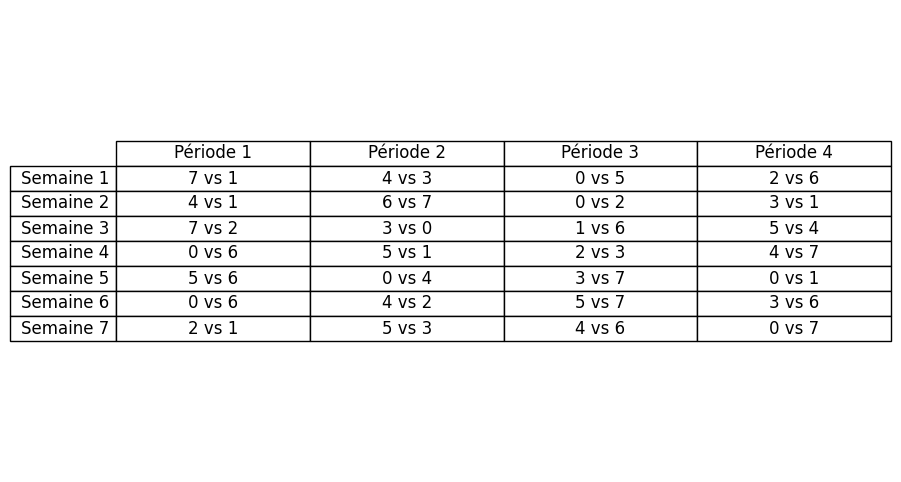

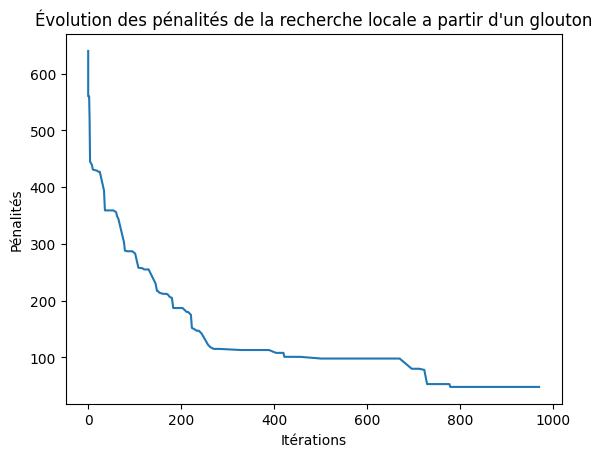

In [58]:
    scheduleLocal, penaltyLocal, penalty_history = local_search_descente.local_search(scheduleGlouton, num_teams, max_iterations=1000, verbose=False)
    print("\n")
    mean_score('local_search_glouton')
    print(f"Exemple de planification pour la recherche locale a partir d'un glouton : Score de la planification (pénalités totales): {penaltyLocal}")
    print_schedule(scheduleLocal)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités de la recherche locale a partir d\'un glouton')
    plt.show()

In [59]:
    # Recuit simulé
    scheduleSimulatedAnnealing, penaltySimulatedAnnealing, penalty_history = simulated_annealing.simulated_annealing(scheduleRandom, num_teams, max_iterations=2000, initial_temp=120, cooling_rate=0.99, verbose=False)
    print("\n")
    mean_score('simulated_annealing_random')
    print(f"Exemple de planification pour le recuit simulé a partir d'un random : Score de la planification (pénalités totales): {penaltySimulatedAnnealing}")
    print_schedule(scheduleSimulatedAnnealing)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités du recuit simulé a partir d\'un random')
    plt.show()

TypeError: simulated_annealing() got an unexpected keyword argument 'local_search'



Calcul de la moyenne pour simulated_annealing_glouton sur 200 itérations avec 8 équipes
Temps moyen d'exécution pour simulated_annealing_glouton: 0.01147 secondes
Score moyen de fitness pour simulated_annealing_glouton: 338.74000
Score maximal de fitness pour simulated_annealing_glouton: 462.00000
Score minimal de fitness pour simulated_annealing_glouton: 218.00000
Meilleurs paramètres - Température initiale: 116.79, Taux de refroidissement: 0.94


Exemple de planification pour le recuit simulé a partir d'un glouton : Score de la planification (pénalités totales): 405


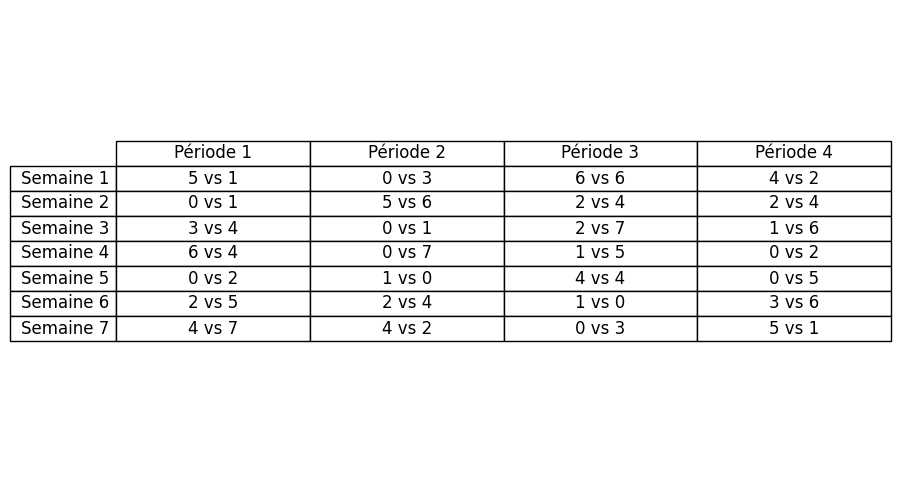

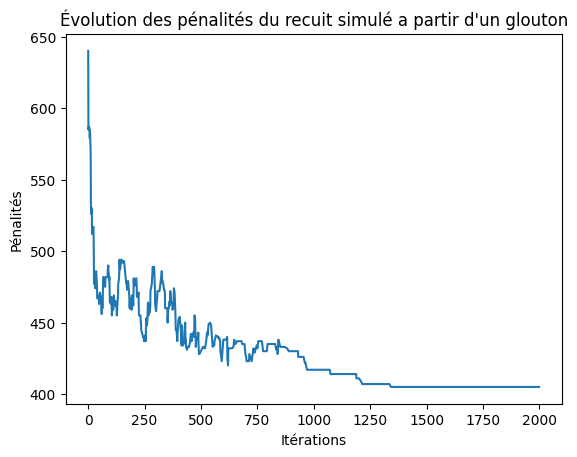

In [42]:
    # Recuit simulé
    scheduleSimulatedAnnealing, penaltySimulatedAnnealing, penalty_history = simulated_annealing.simulated_annealing(scheduleGlouton, num_teams, max_iterations=2000, initial_temp=120, cooling_rate=0.99, verbose=False)
    print("\n")
    mean_score('simulated_annealing_glouton')
    print(f"Exemple de planification pour le recuit simulé a partir d'un glouton : Score de la planification (pénalités totales): {penaltySimulatedAnnealing}")
    print_schedule(scheduleSimulatedAnnealing)
    iterations = [entry[0] for entry in penalty_history]
    penalties = [entry[1] for entry in penalty_history]
    
    plt.plot(iterations, penalties)
    plt.xlabel('Itérations')
    plt.ylabel('Pénalités')
    plt.title('Évolution des pénalités du recuit simulé a partir d\'un glouton')
    plt.show()